In [126]:
from tqdm.notebook import tqdm
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

from collections import Counter

from stockstats import StockDataFrame as Sdf

## Составляющие индекса S&P500
S&P 500 — фондовый индекс, в корзину которого включено 505 акций 500 избранных торгуемых на фондовых биржах США публичных компаний, имеющих наибольшую капитализацию.

The S&P 500 component weights:
https://www.slickcharts.com/sp500

In [80]:
sp500_index = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_companies = sp500_index[0]

In [81]:
# get_nasdaq_symbols().query('ETF==True')

In [82]:
sp500_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [217]:
sp500_companies['GICS Sector'].value_counts()

GICS Sector
Industrials               73
Financials                73
Information Technology    66
Health Care               65
Consumer Discretionary    53
Consumer Staples          37
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    24
Energy                    23
Name: count, dtype: int64

In [83]:
sp500_companies.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [84]:
sp500_companies.to_csv('data/SP500_companies.csv')

In [85]:
# pd.to_datetime(sp500_companies['Date first added'], format="%Y-%m-%d")

In [86]:
symbols = list(sp500_companies['Symbol'])
len(symbols)

503

### Информация за 10 лет

In [182]:
technical_indicators = ['rsi_20', 'macd', 'close_20_sma', 'close_60_sma', 'wr_20', 'wr_60', 'cci_20', 'close_20_mvar', 'dma']

In [183]:
# df = yf.download('GOOGL', start = '2013-01-01', end = '2023-01-01', interval='1d', progress=False)
# Sdf.retype(df)[technical_indicators]

In [184]:
def get_stock_data(ticker, start, end, technical_indicators):
    ts = yf.download(ticker, start, end, interval='1d', threads=False, progress=False)
    ts['MaxDayDelta'] = ts['High'] - ts['Low']
    ts['Volume_Change'] = ts['Volume'].pct_change()
    ts['Close_Change'] = ts['Close'].pct_change()
    indicators_df = Sdf.retype(ts.copy())[technical_indicators]
    concated_df = pd.concat([ts, indicators_df], axis=1).dropna()
    concated_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
    return concated_df

In [211]:
get_stock_data('GOOGL', start = '2013-01-01', end = '2023-01-01', technical_indicators=technical_indicators).head(10)

,Close,MaxDayDelta,Volume_Change,Close_Change,rsi_20,macd,close_20_sma,close_60_sma,wr_20,wr_60,cci_20,close_20_mvar,dma
Date,,,,,,,,,,,,,
2013-01-03,18.109859,0.280531,-0.087790,0.000581,100.000000,0.000236,18.104604,18.104604,-53.706328,-53.706328,66.666667,0.000055,0.000000
2013-01-04,18.467718,0.345095,0.192089,0.019760,100.000000,0.011398,18.225642,18.225642,-14.044923,-14.044923,100.000000,0.043978,0.000000
2013-01-07,18.387136,0.220219,-0.400868,-0.004363,81.261556,0.013286,18.266016,18.266016,-26.966461,-26.966461,61.989858,0.035839,0.000000
2013-01-08,18.350851,0.297047,0.012321,-0.001973,74.632754,0.012588,18.282983,18.282983,-32.784945,-32.784945,19.348345,0.028319,0.000000
2013-01-09,18.471472,0.243994,0.207983,0.006573,80.265725,0.017090,18.314397,18.314397,-13.443011,-13.443011,61.247612,0.028576,0.000000
2013-01-10,18.555555,0.287788,-0.093347,0.004552,83.030714,0.023491,18.348849,18.348849,-12.372714,-12.372714,106.876902,0.032122,0.000000
2013-01-11,18.518269,0.153402,-0.299886,-0.002009,77.933682,0.025633,18.370026,18.370026,-17.609899,-17.609899,87.037378,0.031121,0.000000
2013-01-14,18.099348,0.496748,1.228369,-0.022622,45.152977,0.005942,18.339951,18.339951,-76.450212,-76.450212,-45.352848,0.035371,0.000000
2013-01-15,18.141392,0.573072,0.371452,0.002323,47.486487,-0.005947,18.320095,18.320095,-61.003014,-61.003014,-97.625379,0.035384,0.000000


In [186]:
def get_sp500_data(sp500_df, start=None, end=None):
    data = []
    for i, row in tqdm(sp500_df.iterrows(), total=len(sp500_df)):
        sector, ticker = row['GICS Sector'], row['Symbol']
        try:
            stock_data = get_stock_data(ticker, start, end, technical_indicators)
            data.append({
                'ticker': ticker,
                'sector': sector,
                'data': stock_data
            })
        except Exception as e:
            print(f'Error occurred with ticker {ticker}: {e}')
    return data

In [200]:
total_data = get_sp500_data(sp500_companies, start = '2013-01-01', end = '2023-01-01')
len(total_data)

  0%|          | 0/503 [00:00<?, ?it/s]


1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


503

In [201]:
# with open('data/sp500_data.pickle', 'rb') as f:
#     data_for_symbols = pickle.load(f)

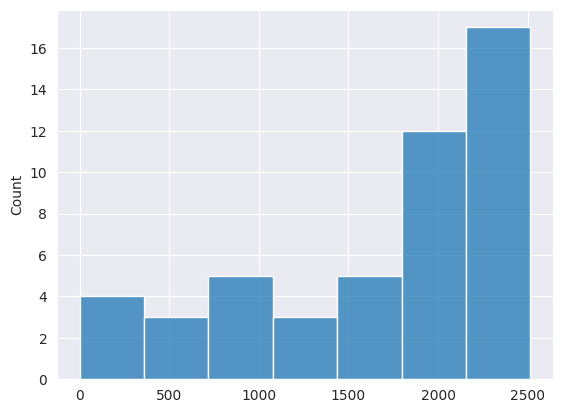

In [202]:
observations = [len(d['data']) for d in total_data]
most_popular = Counter(observations).most_common()[0][0]
counts = filter(lambda x: x < most_popular, observations)
sns.histplot(x=counts)
plt.show()

In [203]:
most_popular

2517

### Убираем тикеры с количеством записей не равным медиане

In [204]:
filtered_total_data = [d for d in total_data if len(d['data']) == most_popular]
len(filtered_total_data), len(total_data) - len(filtered_total_data)

(454, 49)

In [205]:
with open('data/sp500_components_10y.pickle', 'wb') as f:
    pickle.dump(filtered_total_data, f)

In [193]:
# sp_close_prices = {k: v['Close'] for k, v in data_for_symbols.items()}
# sp_close_prices = pd.DataFrame(sp_close_prices)
# sp_close_prices.to_csv('data/sp_close_prices_new.csv')

## Данные индекса S&P500

In [206]:
sp500_index = get_stock_data('^GSPC', start = '2013-01-01', end = '2023-01-01', technical_indicators=technical_indicators)
len(sp500_index)
# sp500_prices = pdr.data.get_data_yahoo('^GSPC', adjust_dividends=False, start=start, end=end)

2517

In [207]:
sp500_index.columns

Index(['Close', 'MaxDayDelta', 'Volume_Change', 'Close_Change', 'rsi_20',
       'macd', 'close_20_sma', 'close_60_sma', 'wr_20', 'wr_60', 'cci_20',
       'close_20_mvar', 'dma'],
      dtype='object')

<Axes: xlabel='Date'>

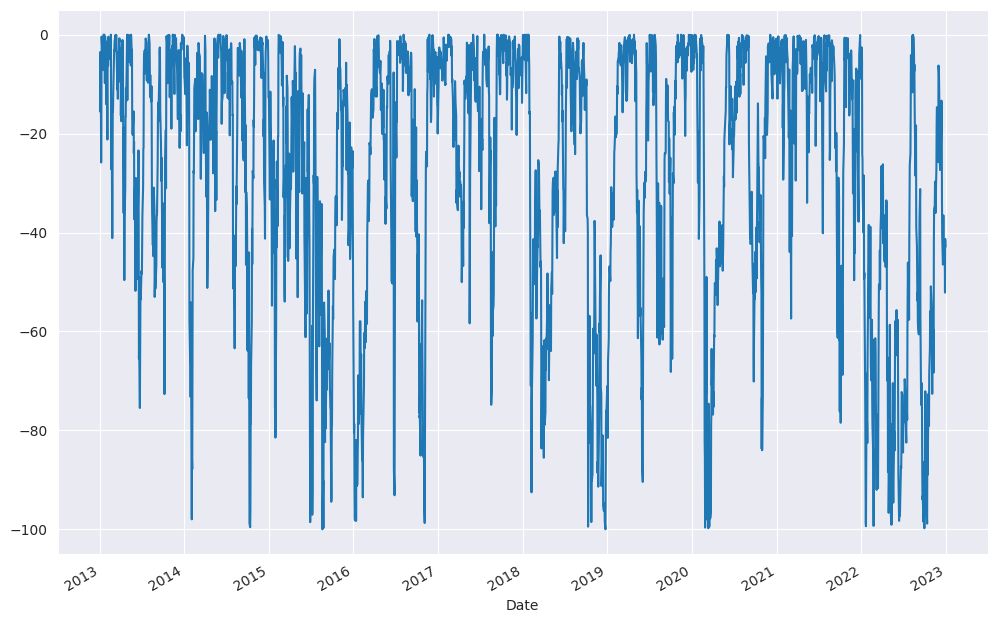

In [216]:
fig = plt.figure(figsize=(12, 8))
sp500_index['wr_60'].plot()

In [197]:
sp500_index.to_csv('data/sp500_index_10y.csv')